<h1>Olympics Data Analysis</h1>

<h3>Objective</h3>

The objective of Olympics data analysis is to explore and understand trends in Olympic performance. This includes identifying top-performing countries and athletes, tracking changes in participation, and examining the popularity of different sports. It also involves studying factors like the impact of economic or political events on performance. The analysis helps predict future outcomes, improve athlete training, and optimize resources for future Olympics. Additionally, it provides insights into audience preferences and sponsorship opportunities.

<h3>Importing Libraries</h3>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Data uploading and reading</h3>

In [10]:
#Load Data set
athletes = pd.read_csv('C:/Users/aryan/Downloads/Olympics Data/athlete_events.csv')
regions = pd.read_csv('C:/Users/aryan/Downloads/Olympics Data/noc_regions.csv')

In [19]:
#Displaying First 5 cols
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [20]:
#Displaying First 5 cols
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [16]:
#Join the Data Frames
athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [21]:
#Displating totol no. of rows and cols
athletes_df.shape

(271116, 17)

In [23]:
#Col names consistent
athletes_df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace=True);

In [26]:
#Checking for applied changes on col names - region and notes
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [27]:
#Displaying info of dataframe
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [28]:
#Calculate Statistical summary for the dataframe
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [34]:
#Checking null values
nan_values = athletes_df.isna()  #checks each element in the DataFrame
nan_columns = nan_values.any()   #checks each col in the DataFrame
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [31]:
#Checking total no. of null values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [37]:
#India Details
athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [38]:
#Japan Details
athletes_df.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [41]:
#Top 10 countries participating
top_10_countries  = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

<h3>Data Visualization </h3>

<Axes: title={'center': 'Overall Participation by Country'}, xlabel='Team', ylabel='count'>

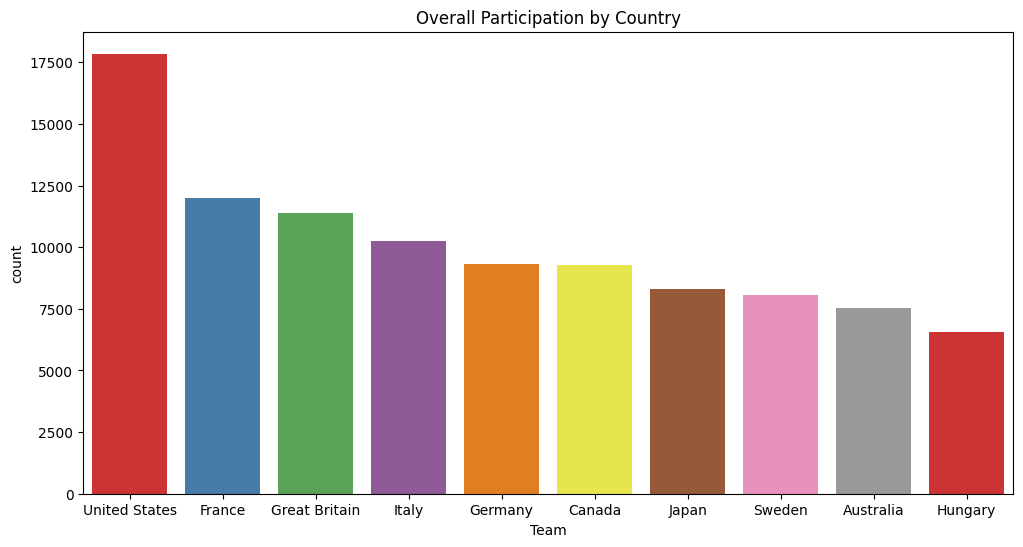

In [140]:
#plot for the top 10 countries participating
plt.figure(figsize=(12,6))
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, hue=top_10_countries.index, legend=False,palette = 'Set1')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34.,
        36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60.,
        62., 64., 66., 68., 70., 72., 74., 76., 78.]),
 <BarContainer object of 34 artists>)

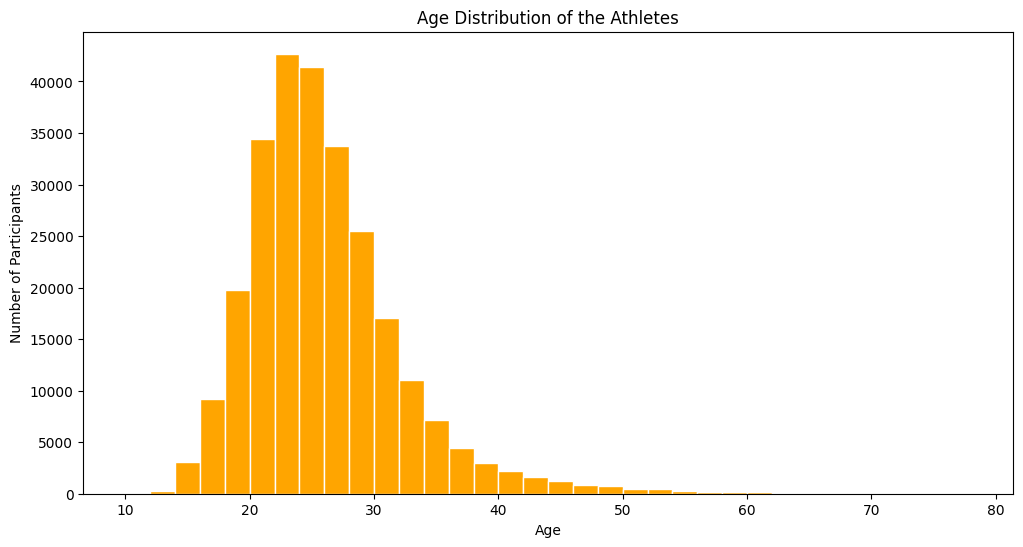

In [117]:
#Age Distribution of participants
plt.figure(figsize=(12,6))
plt.title('Age Distribution of the Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')  
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color='orange',edgecolor='white')

In [66]:
gender_counts = athletes_df.Sex.value_counts()
gender_counts

Sex
M    196594
F     74522
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14c4600a5d0>,
 [Text(0.714730870516623, -0.8361577499076059, 'M'),
  Text(-0.7147307442603072, 0.8361578578289552, 'F')],
 [Text(0.38985320209997615, -0.45608604540414865, '72.5%'),
  Text(-0.38985313323289483, 0.4560861042703392, '27.5%')])

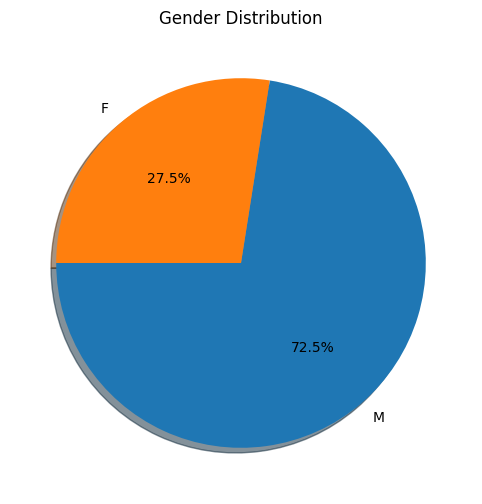

In [70]:
#Pieplot for male and female athletes
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180,shadow=True)


In [80]:
#Total no. of female athletes in each olympics
womenOlympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

Text(0.5, 1.0, 'Plot of Female Athletes over time')

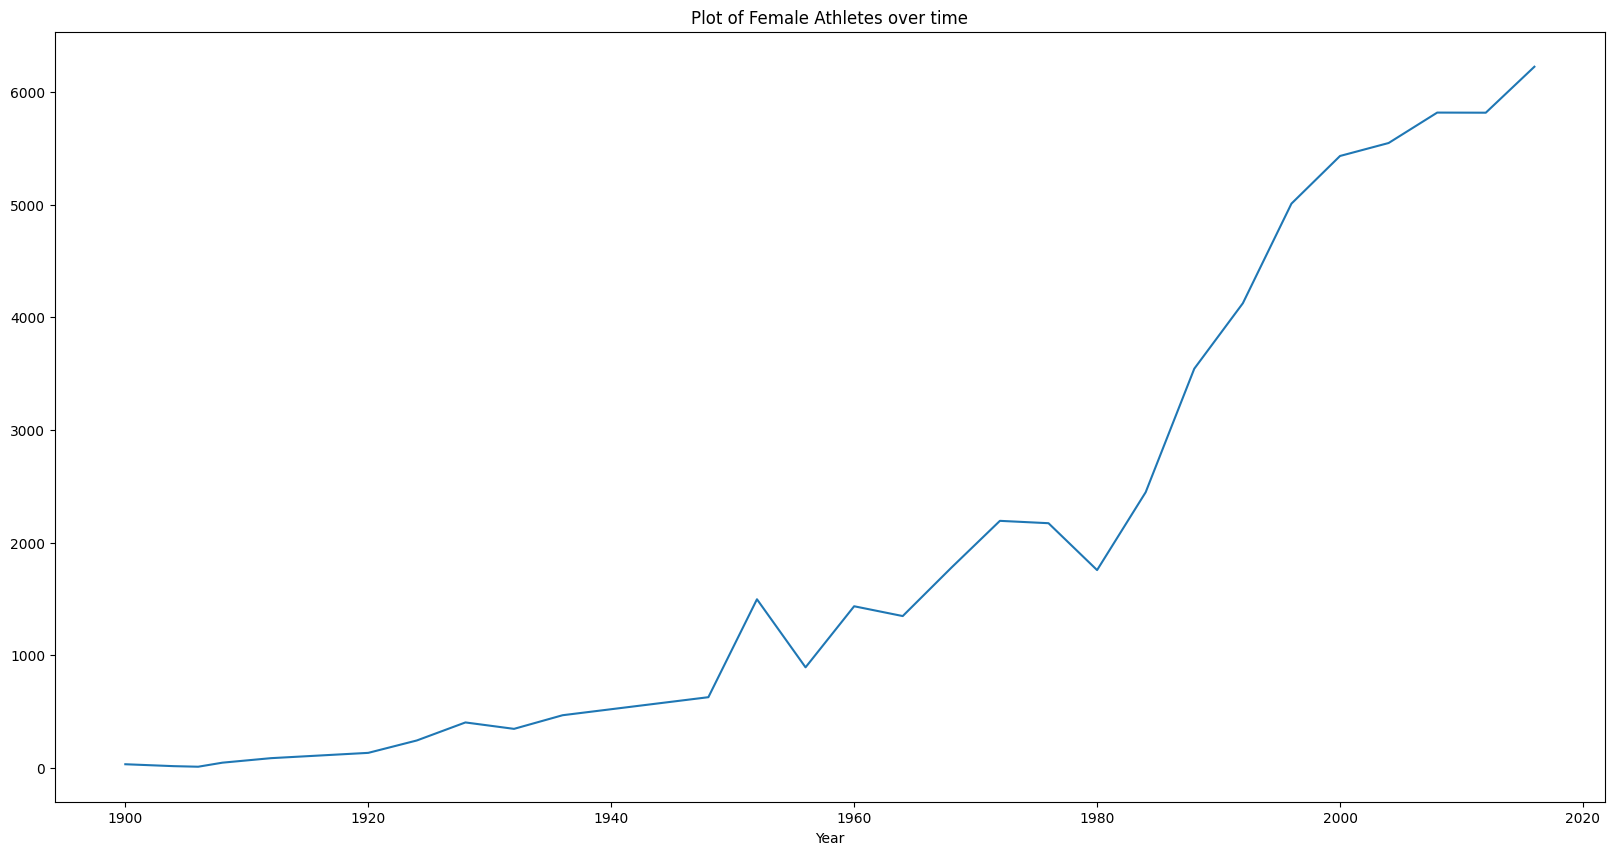

In [119]:
#Plot for female participation over time
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [108]:
#Gold Medals by Countries
goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
total_goldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
total_goldMedals

,Region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501


Text(0.5, 1.0, 'Gold Medals per Country')

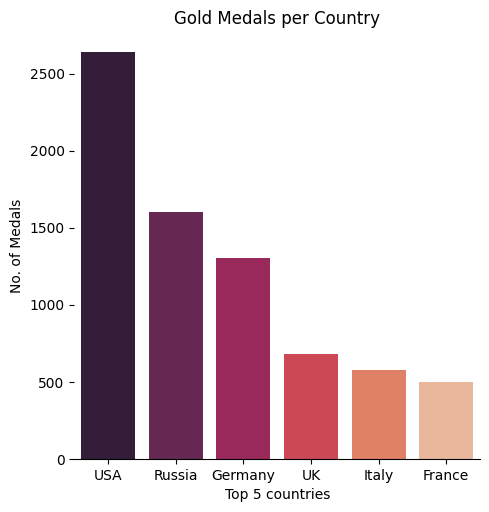

In [120]:
#Plot for Gold Medals per Countries
total_goldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x="Region", y="Medal", hue="Region",data= total_goldMedals, height=5, kind="bar", palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("No. of Medals")
plt.title('Gold Medals per Country')

In [121]:
#Latest Olympics - Rio Olympics
max_year = athletes_df.Year.max()
team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

Team
United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: count, dtype: int64

Text(0.5, 0, 'Country wise medals for the year 2016')

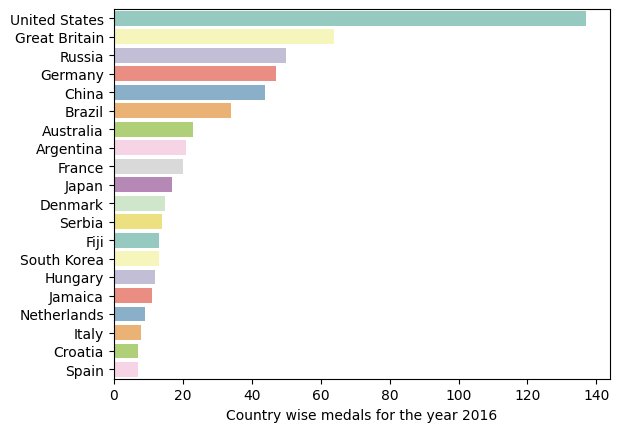

In [139]:
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index,hue=team_names.value_counts().head(20).index,palette='Set3',legend=False)
plt.ylabel(None)
plt.xlabel('Country wise medals for the year 2016')

<h3>Conclusion</h3>

Following conclusions can be made by analyzing the olympics data 
1)USA, France, and Great Britain are historically among the most participating countries in the Olympics.These countries 
  have contributed significantly to the history of the Olympics through their participation, performances, and hosting of the Games.
2)Athletes between the ages of 20 and 30 are typically the most common participants in the Olympics. This age range is often considered the peak of       physical performance for many sports, where athletes have developed the necessary skills, experience, and physical conditioning.
3)The data shows that there are significantly more male athletes (196,594) than female athletes (74,522) in the Olympics, with a male-to-female ratio     of about 2.6:1.
4)The percentage of female athletes has steadily increased, and the gap between male and female participation has narrowed.The trend shows more female    athletes is expected to continue in future Games.
5)This data shows the USA as the dominant country in terms of gold medals, followed by Russia and Germany. These countries have consistently performed    well across multiple Olympic Games, contributing to their high medal counts.
6)The United States led by a significant margin, followed by Great Britain, Russia, and Germany. These countries showcased strong performances across     various sports, with the USA dominating the medal tally in the Rio 2016 Olympics.